In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('dataset/lab2_1_data.csv', header=None)
 
df = df.T
df.head()
data = df.values
data.shape

(100, 2)

[[ 1.         -0.79945262]
 [-0.79945262  1.        ]]
[1.79945262 0.20054738]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


(-1.0537385000000001, 1.0041085, -1.10616, 1.1963599999999999)

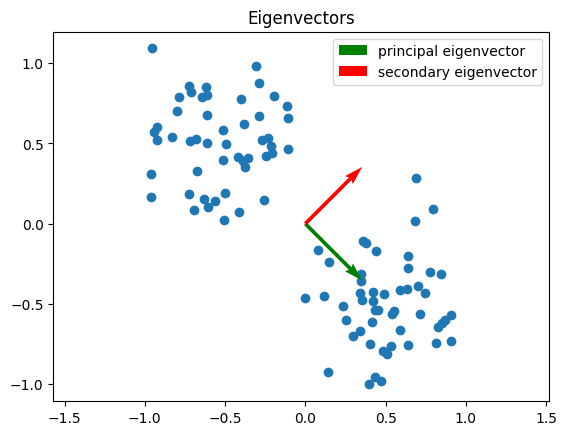

In [242]:
# correlation matrix
corr = np.corrcoef(data.T)
print(corr)
# eigen decomposition
eig_vals, eig_vecs = np.linalg.eig(corr)
print(eig_vals)
print(eig_vecs)


# plot the data
plt.scatter(data[:,0], data[:,1])
# plot the eigenvectors
principal_eigenvector = eig_vecs[:,0]
secondary_eigenvector = eig_vecs[:,1]

# plot the eigenvectors
plt.quiver(0, 0, principal_eigenvector[0], principal_eigenvector[1], scale= 2, scale_units='xy', angles='xy', color='g', label='principal eigenvector')
plt.quiver(0, 0, secondary_eigenvector[0], secondary_eigenvector[1], scale=2, scale_units='xy', angles='xy', color='r', label='secondary eigenvector')
plt.title('Eigenvectors')
plt.legend()
plt.axis('equal')


In [16]:
class Hebbian:
    def __init__(self, dim) -> None:
        self.w = (np.random.rand(1, dim) - 0.5) * 2 # weight vector in range [-1, 1]
        

    def train(self, data):
        # empty, must be implemented in subclass
        print("train method not implemented")
        
    def predict(self, data):
        return np.dot(data, self.w.T)

In [174]:
class BasicHebbian(Hebbian):

    def __init__(self, dim) -> None:
        super().__init__(dim)

    def train(self, data, eta, n_epochs):
        # shuffle the data
        np.random.shuffle(data)
        self.ws = []
        for epoch in range(n_epochs):
            for u in data:
                v = np.dot(self.w, u.T)
                self.w += eta*(u * v)
                self.ws.append(self.w.copy())
        return np.array(self.ws).squeeze()
        


In [246]:
hebbian_net = BasicHebbian(2)
ws=hebbian_net.train(data, 1e-3, 100)


In [247]:
pred = hebbian_net.predict(data)
np.linalg.norm(pred) # -> inf: the learning rule is not stable

216.61790648747265

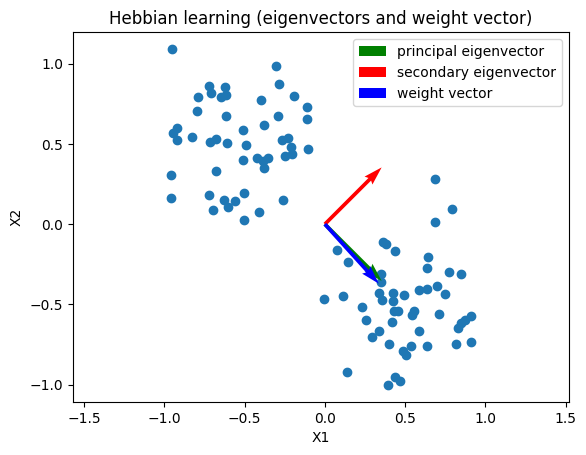

In [248]:

# plot the data
plt.scatter(data[:,0], data[:,1])
# plot the eigenvectors
principal_eigenvector = eig_vecs[:,0]
secondary_eigenvector = eig_vecs[:,1]

# plot the eigenvectors
plt.quiver(0, 0, principal_eigenvector[0], principal_eigenvector[1], scale= 2, scale_units='xy', angles='xy', color='g', label='principal eigenvector')
plt.quiver(0, 0, secondary_eigenvector[0], secondary_eigenvector[1], scale=2, scale_units='xy', angles='xy', color='r', label='secondary eigenvector')
plt.xlabel('X1')
plt.ylabel('X2')
# plot the weight vector

norm_w = hebbian_net.w / np.linalg.norm(hebbian_net.w)
plt.quiver(0, 0, norm_w[0,0], norm_w[0,1], scale=2, scale_units='xy', angles='xy', color='b', label='weight vector')
plt.legend()
plt.axis('equal')
plt.title('Hebbian learning (eigenvectors and weight vector)')
plt.show()

(10000, 2)


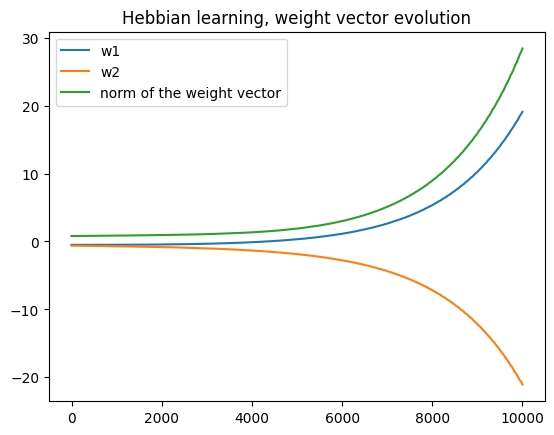

In [249]:
print(ws.shape)
plt.plot(ws[:,0], label='w1')
plt.plot(ws[:,1], label='w2')
plt.plot(np.linalg.norm(ws, axis=1), label='norm of the weight vector')
plt.title('Hebbian learning, weight vector evolution')
plt.legend()
plt.show()

In [167]:
class OjaHebbian(Hebbian):

    def __init__(self, dim) -> None:
        super().__init__(dim)
        
    def train(self, data, eta, alpha, n_epochs):
        # shuffle the data
        np.random.shuffle(data)
        self.ws = []
        for epoch in range(n_epochs):
            for u in data:
                v = np.dot(self.w, u.T)
                self.w += 0.1 * v * (u - alpha * v * self.w)
                self.ws.append(self.w.copy().squeeze())
        return np.array(self.ws)
    

In [252]:
oja_net = OjaHebbian(2)
ws = oja_net.train(data, 0.01, 2, 10)


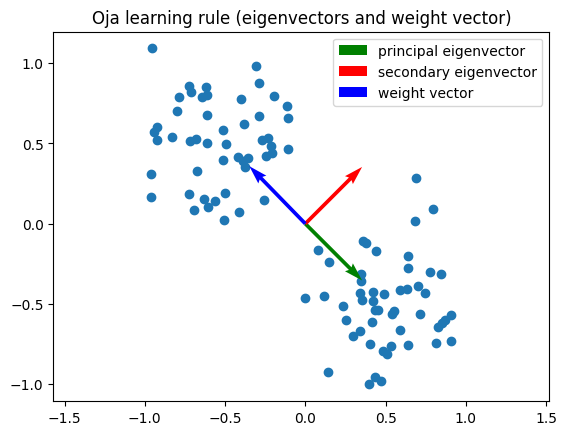

In [253]:

plt.scatter(data[:,0], data[:,1])
# plot the eigenvectors
plt.quiver(0, 0, principal_eigenvector[0], principal_eigenvector[1], scale= 2, scale_units='xy', angles='xy', color='g', label='principal eigenvector')
plt.quiver(0, 0, secondary_eigenvector[0], secondary_eigenvector[1], scale=2, scale_units='xy', angles='xy', color='r', label='secondary eigenvector')

# plot the weight vector
norm_w = oja_net.w / np.linalg.norm(oja_net.w)
plt.quiver(0, 0, norm_w[0,0], norm_w[0,1], scale=2, scale_units='xy', angles='xy', color='b', label='weight vector')
plt.axis('equal')
plt.legend()
plt.title('Oja learning rule (eigenvectors and weight vector)')
plt.show()

(1000, 2)


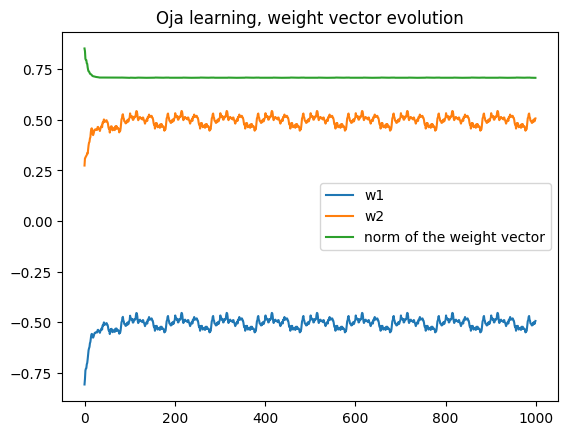

In [254]:
print(ws.shape)
plt.plot(ws[:,0], label='w1')
plt.plot(ws[:,1], label='w2')
plt.plot(np.linalg.norm(ws, axis=1), label='norm of the weight vector')
plt.legend()
plt.title('Oja learning, weight vector evolution')
plt.show()

In [256]:
class SubtractiveNorm(Hebbian):
    def __init__(self, dim) -> None:
        super().__init__(dim)

    def train(self, data, eta, n_epochs):
        # shuffle the data
        np.random.shuffle(data)
        self.ws = []
        n_u =len(self.w)
        n=np.ones_like(data[0])
        for epoch in range(n_epochs):
            for u in data:
                v = np.dot(self.w, u.T)
           
                self.w += eta*v*(u - (np.dot(u,n))*n/n_u)

                self.ws.append(self.w.copy())
        return np.array(self.ws).squeeze()

In [259]:
sub_norm = SubtractiveNorm(2)
ws = sub_norm.train(data, 0.01, 20)


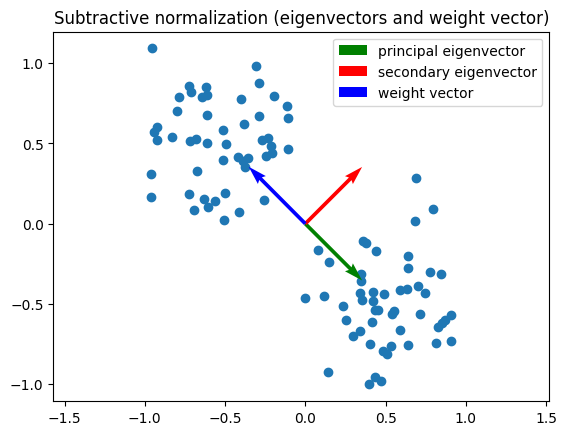

In [260]:
plt.scatter(data[:,0], data[:,1])
# plot the eigenvectors
plt.quiver(0, 0, principal_eigenvector[0], principal_eigenvector[1], scale= 2, scale_units='xy', angles='xy', color='g', label='principal eigenvector')
plt.quiver(0, 0, secondary_eigenvector[0], secondary_eigenvector[1], scale=2, scale_units='xy', angles='xy', color='r', label='secondary eigenvector')

# plot the weight vector
norm_w = sub_norm.w / np.linalg.norm(sub_norm.w)
plt.quiver(0, 0, norm_w[0,0], norm_w[0,1], scale=2, scale_units='xy', angles='xy', color='b', label='weight vector')
plt.axis('equal')
plt.legend()
plt.title('Subtractive normalization (eigenvectors and weight vector)')
plt.show()


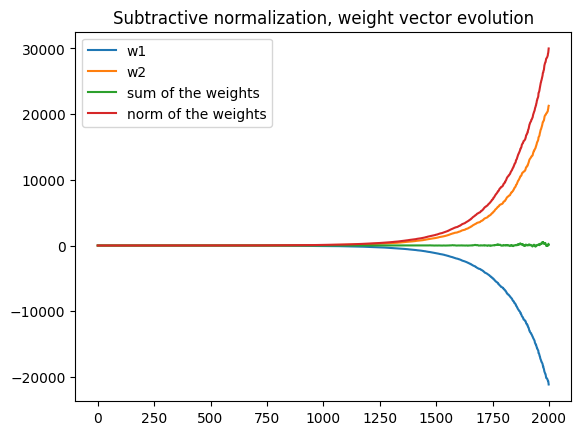

In [261]:
ws.shape

plt.plot(ws[:,0], label='w1')
plt.plot(ws[:,1], label='w2')
plt.plot(np.sum(ws, axis=1), label='sum of the weights')
plt.plot(np.linalg.norm(ws, axis=1), label='norm of the weights')
plt.legend()
plt.title('Subtractive normalization, weight vector evolution')
plt.show()

In [262]:
class BCM(Hebbian):
    def __init__(self, dim) -> None:
        super().__init__(dim)

    def train(self, data, eta, eta_th, theta_0, n_epochs):
        # shuffle the data

        np.random.shuffle(data)
        theta = theta_0
        self.ws = []
        for epoch in range(n_epochs):
            for u in data:
                v = np.dot(self.w, u.T)
                self.w += eta*(v*u *(v -theta))
                theta += eta_th*(v**2 - theta)
                self.ws.append(self.w.copy())
        return np.array(self.ws).squeeze()
    

In [263]:
BCM_net = BCM(2)
ws = BCM_net.train(data, 0.01, 0.01, 0.5, 20)


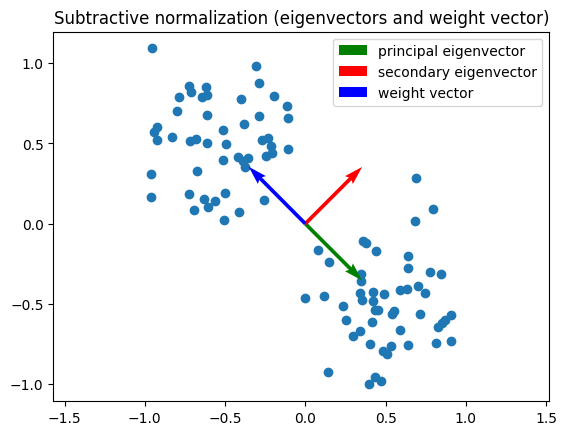

In [267]:
plt.scatter(data[:,0], data[:,1])
# plot the eigenvectors
plt.quiver(0, 0, principal_eigenvector[0], principal_eigenvector[1], scale= 2, scale_units='xy', angles='xy', color='g', label='principal eigenvector')
plt.quiver(0, 0, secondary_eigenvector[0], secondary_eigenvector[1], scale=2, scale_units='xy', angles='xy', color='r', label='secondary eigenvector')

# plot the weight vector
norm_w = sub_norm.w / np.linalg.norm(sub_norm.w)
plt.quiver(0, 0, norm_w[0,0], norm_w[0,1], scale=2, scale_units='xy', angles='xy', color='b', label='weight vector')
plt.axis('equal')
plt.legend()
plt.title('Subtractive normalization (eigenvectors and weight vector)')
plt.show()

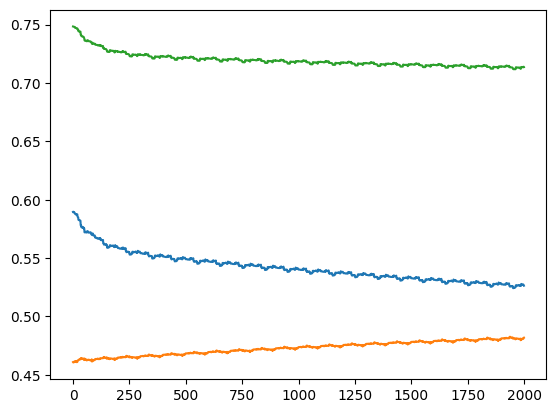

In [266]:
plt.plot(ws[:,0], label='w1')
plt.plot(ws[:,1], label='w2')
plt.plot(np.linalg.norm(ws, axis=1), label='norm of the weight vector')

In [296]:
class CovarianceRule(Hebbian):
    def __init__(self, dim) -> None:
        super().__init__(dim)

    def train(self, data, eta, n_epochs, update, theta=None):
        # shuffle the data
        np.random.shuffle(data)
        u_bar = np.mean(data, axis=0)
        
        ws = []
       
        for epoch in range(n_epochs):
            
            for u in data:
                # w<- Cw
                if update =='covariance matrix':
                    C = np.outer(u - u_bar, u - u_bar)
                    self.w += eta*(C @ self.w.T).T
                # w<- w + v*(u-theta_u)
                elif update == 'u':
                    if theta is None:
                        theta = u_bar
                    v = np.dot(self.w, u.T)
                    self.w+= eta* v* (u - theta)
                # w<- w + (v -theta_v)*u
                elif update == 'v':
                    v_bar = np.dot(self.w, u_bar.T)
                    if theta is None:
                        theta = v_bar
                    v = np.dot(self.w, u.T)
                    self.w+= eta* (v - theta)* u

                    
                ws.append(self.w.copy())
        return np.array(ws).squeeze()
    

                

                

In [297]:
cov_net = CovarianceRule(2)
ws = cov_net.train(data, 0.01, 20, 'covariance matrix')

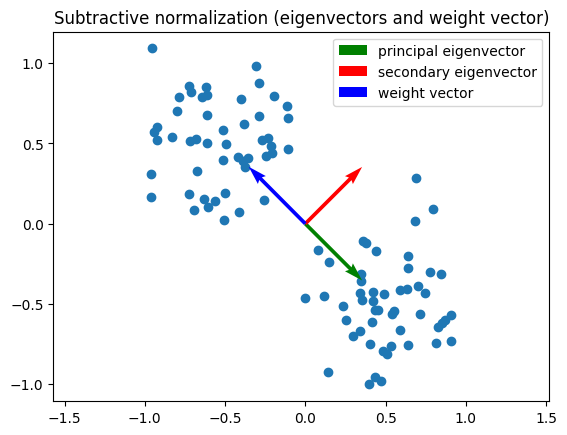

In [299]:
plt.scatter(data[:,0], data[:,1])
# plot the eigenvectors
plt.quiver(0, 0, principal_eigenvector[0], principal_eigenvector[1], scale= 2, scale_units='xy', angles='xy', color='g', label='principal eigenvector')
plt.quiver(0, 0, secondary_eigenvector[0], secondary_eigenvector[1], scale=2, scale_units='xy', angles='xy', color='r', label='secondary eigenvector')

# plot the weight vector
norm_w = sub_norm.w / np.linalg.norm(sub_norm.w)
plt.quiver(0, 0, norm_w[0,0], norm_w[0,1], scale=2, scale_units='xy', angles='xy', color='b', label='weight vector')
plt.axis('equal')
plt.legend()
plt.title('Subtractive normalization (eigenvectors and weight vector)')
plt.show()

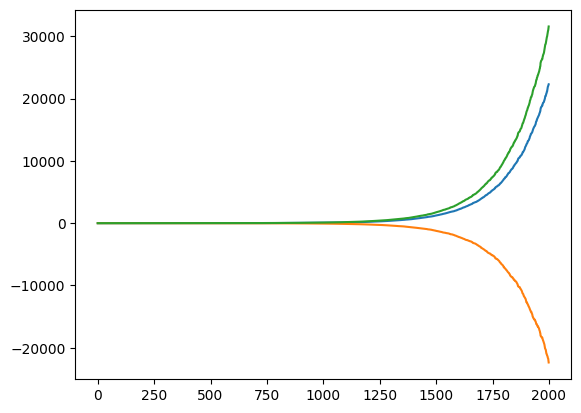

In [298]:
plt.plot(ws[:,0], label='w1')
plt.plot(ws[:,1], label='w2')
plt.plot(np.linalg.norm(ws, axis=1), label='norm of the weight vector')